### Cleaning txt file and Plotting datasets

In [5]:
# Load the text file and inspect its content to understand the structure
file_path = 'training-ANN.txt'

# Read the file
with open(file_path, 'r') as file:
    content = file.readlines()

# Display the first 50 lines to understand the structure
for line in content[:50]:
    print(line.strip())

=== Run information ===

Scheme:       weka.classifiers.functions.MultilayerPerceptron -L 0.3 -M 0.2 -N 500 -V 0 -S 0 -E 20 -H a
"Relation:     ML-ENUGU-Ta-weka.filters.unsupervised.instance.Resample-S1-Z70.0-no-replacement-weka.filters.unsupervised.attribute.Remove-R1,7"
Instances:    8769
Attributes:   6
Max Temp
Min Temp
Solar Rad
Wind
RH
ETo
Test mode:    evaluate on training data

=== Classifier model (full training set) ===

Linear Node 0
Inputs    Weights
Threshold    1.2663983420328755
Node 1    -2.5770949953639173
Node 2    1.14424569755722
Node 3    -1.4905091100905024
Sigmoid Node 1
Inputs    Weights
Threshold    -0.18606485476197207
Attrib Max Temp    -0.21233213900500508
Attrib Min Temp    -0.12027432700153837
Attrib  Solar Rad    -0.9997206824885223
Attrib Wind    0.19401554423525522
Attrib RH    0.6884295633073487
Sigmoid Node 2
Inputs    Weights
Threshold    -1.3211360004731583
Attrib Max Temp    0.8904617413470095
Attrib Min Temp    -0.09870673395151533
Attrib  Solar R

In [6]:
# Find where predictions start and end, skipping evaluation metrics
start_idx = None
end_idx = None
data = []

with open(file_path, 'r') as file:
    lines = file.readlines()
    for i, line in enumerate(lines):
        if '=== Predictions on training set ===' in line:
            start_idx = i + 1
        elif '=== Evaluation on training set ===' in line:
            end_idx = i
            break
    
    if start_idx and end_idx:
        # Skip the header line after the marker
        start_idx += 1
        
        # Process only the prediction lines before evaluation metrics
        for line in lines[start_idx:end_idx]:
            # Skip empty lines
            if line.strip() == '':
                continue
            
            # Split the line and clean the data
            parts = line.strip().split()
            if len(parts) >= 4:  # Ensure we have all required columns
                inst = parts[0]
                actual = parts[1]
                predicted = parts[2]
                error = parts[3]
                data.append([inst, actual, predicted, error])

In [8]:
# slice the first 9 entry to ensure conversion was good

data[0:10] 

[['inst#', 'actual', 'predicted', 'error'],
 ['1', '3.63', '3.524', '-0.106'],
 ['2', '2.26', '2.108', '-0.152'],
 ['3', '3.8', '3.809', '0.009'],
 ['4', '4.58', '4.427', '-0.153'],
 ['5', '3.55', '3.448', '-0.102'],
 ['6', '4.32', '4.268', '-0.052'],
 ['7', '4.14', '4.061', '-0.079'],
 ['8', '2.78', '2.646', '-0.134'],
 ['9', '3.71', '3.642', '-0.068']]

In [9]:
# Create DataFrame and write to csv
import pandas as pd
df = pd.DataFrame(data, columns=['inst#', 'actual', 'predicted', 'error'])

# Save as CSV
df.to_csv('ANN_predictions_clean.csv', index=False)

# Display first few rows and total number of rows
print("First few rows:")
print(df.head())
print("\
Total number of predictions:", len(df))

First few rows:
   inst#  actual  predicted   error
0  inst#  actual  predicted   error
1      1    3.63      3.524  -0.106
2      2    2.26      2.108  -0.152
3      3     3.8      3.809   0.009
4      4    4.58      4.427  -0.153
Total number of predictions: 8770


In [11]:
# adding cleaning - see that we additional row name. read the csv abd clean it up
df = pd.read_csv("ANN_predictions_clean.csv", skiprows=1)
df.head()

,inst#,actual,predicted,error
0,1,3.63,3.524,-0.106
1,2,2.26,2.108,-0.152
2,3,3.80,3.809,0.009
3,4,4.58,4.427,-0.153
4,5,3.55,3.448,-0.102


In [12]:
## Rewrite the data for final cleaning
# Save as CSV
df.to_csv('ANN_predictions_clean_updated.csv', index=False)

In [13]:
# plot stuff
import matplotlib.pyplot as plt


In [14]:
# read csv

df_data = pd.read_csv("ANN_predictions_clean_updated.csv")
df_data.head()

,inst#,actual,predicted,error
0,1,3.63,3.524,-0.106
1,2,2.26,2.108,-0.152
2,3,3.80,3.809,0.009
3,4,4.58,4.427,-0.153
4,5,3.55,3.448,-0.102


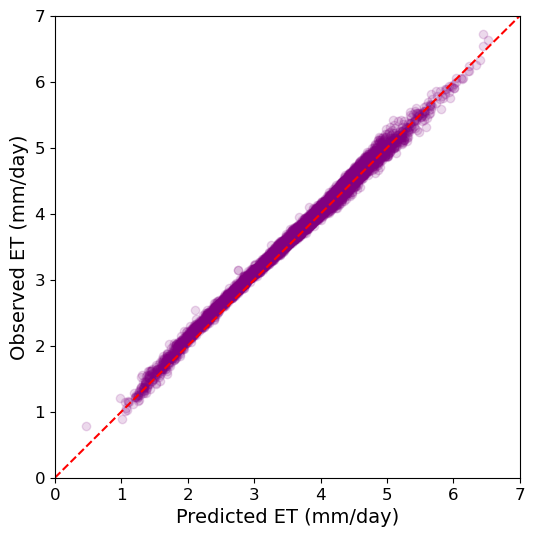

In [49]:
# Plot the data
plt.figure(figsize=(6, 6))

plt.scatter(df_data["predicted"],df_data["actual"], c="purple", alpha=0.15)
plt.xlabel("Predicted ET (mm/day)", fontsize=14)
plt.ylabel("Observed ET (mm/day)", fontsize=14)
plt.xlim(0,7)
plt.ylim(0,7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.plot([0,7], [0,7], c='r', linestyle="--")
plt.savefig("ET_plot.jpg", dpi=600, facecolor="none", bbox_inches="tight")
plt.show()